In [1]:
# Multiclass Classification

# Dataset Preparation
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image
from keras.utils import load_img,img_to_array

In [2]:
p = Path("./new/train")
dirs = p.glob("*")
print(dirs)

<generator object Path.glob at 0x000002368385F3C0>


In [3]:
labels_dict = {"PNEUMONIA":0,"NORMAL":1}
image_data = []
labels = []

In [4]:
for folder_dir in dirs:
    #print(folder_dir)
    label = str(folder_dir).split("\\")[-1][:-1]
    #print(label)  # folder label name

    for img_path in folder_dir.glob("*.jpeg"):
        # Now we got directory/path of all jpg files in folders
        img = load_img(img_path,target_size=(32,32))
        img_array = img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

image_data = np.array(image_data,dtype='float32')/255.0  # here we converted data into numpy array with all values lie b/w [0,1]
labels = np.array(labels)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
# Randomly shuffle the data
# First combining labels and numpy array of rgb data
import random
# zip
combined = list(zip(image_data,labels))
random.shuffle(combined)



In [6]:
# Unzip
image_data[:],labels[:] = zip(*combined)
# Now we got shuffled data of images as well as labels

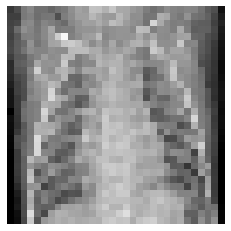

In [7]:
# Data visulaization -> pass the rgb data of iamge here and it will plot a image in matplotlib for it
def drawImg(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return

drawImg(image_data[0])

In [8]:
# SVM CLASSIFIER

class SVM:
    def __init__(self,c=1.0):
        self.c = c
        self.w = 0
        self.b = 0
    
    def hingeLoss(self,w,b,x,y):
        loss = 0.0
        loss += 0.5*np.dot(w,w.T)

        m = x.shape[0]
        for i in range(m):
            ti = y[i]*(np.dot(w,x[i].T)+b)
            loss += self.c * max(0,(1-ti))
        return loss[0][0]

    def fit(self,x,y,batch_size=100,learning_rate=0.00001,maxItr=200):
        no_of_features = x.shape[1]
        no_of_samples = x.shape[0]

        n = learning_rate
        c = self.c

        # Init the model parameters
        w = np.zeros((1,no_of_features))
        bias = 0

        # print(self.hingeLoss(w,bias,x,y))   # Initial Loss

        # Training from here...
        losses = []
        for i in range(maxItr):
            # Training loop
            l = self.hingeLoss(w,bias,x,y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)

            # Batch gradient descent
            for batch_start in range(0,no_of_samples,batch_size):
                gradw = 0
                gradb = 0

                # Iterate over all examples in mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        ii = ids[j]
                        ti = y[ii]*(np.dot(w,x[ii].T)+bias) 
                        if(ti>=1):
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += (-1)*c*y[ii]*x[ii]
                            gradb += (-1)*c*y[ii]
                    else:
                        break
                w = w - n*w - n*gradw
                bias = bias - n*gradb
        self.w = w
        self.b = bias
        return w,bias,losses

# We need to convert data for One vs One classification

m = image_data.shape[0]
image_data = image_data.reshape(m,-1)
print(image_data.shape)

classes = len(np.unique(labels))
print(classes)

def classWiseData(x,y):
    data = {}
    for i in range(classes):
        data[i] = []
    for i in range(x.shape[0]): 
        data[y[i]].append(x[i])
    for k in data.keys():
        data[k] = np.array(data[k])

    return data

data = classWiseData(image_data,labels)
print(data[0].shape)

(624, 3072)
2
(390, 3072)


In [9]:
def getDataPairForSVM(d1,d2):
                #label (if one class which we are checking if it is then 1 otherwise -1)
    # ----------x--------------    y
    #  .......................    -1
    #  .......................     1
    #  .......................    -1
    #  .......................     1

    # l1-> -1 ; l2-> +1 

    l1,l2 = d1.shape[0],d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]

    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))

    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2

    data_labels[:l1] = -1
    data_labels[l1:] = +1

    return data_pair,data_labels

In [10]:
# Training NC2 SVM'S PART!
mySVM = SVM()
def trainSVM(x,y):
    svm_classifiers = {}
    for i in range(classes):
        svm_classifiers[i] = {}
        for j in range(i+1,classes):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair)
            svm_classifiers[i][j] = (wts,b)
    return svm_classifiers


In [11]:
# Here np.array(wts) is 3072 weights 
# svm_classifiers = {0:{1: (np.array(wts),bias),2: (np.array(wts),bias),3: (np.array(wts),bias)},1:{2: (np.array(wts),bias),3: (np.array(wts),bias)},2:{3: (np.array(wts),bias)}}
svm_classifiers = trainSVM(image_data,labels)
# Parameters for first two things
print(svm_classifiers[0][1])

(array([[-0.00887935, -0.00887935, -0.00887935, ...,  0.00176585,
         0.00176585,  0.00176585]]), -0.01073999999999999)


In [12]:
# PREDICTION

def binaryPredict(x,w,b):
    z = np.dot(x,w.T) + b
    if(z>=0):
        return 1
    else:
        return -1


def predict(x):
    count = np.zeros((classes,))
    for i in range(classes):
        for j in range(i+1,classes):
            w,b = svm_classifiers[i][j]

            # take a majority prediction
            z = binaryPredict(x,w,b)

            if(z==1):
                count[j] += 1
            else:
                count[i] += 1

    return max(count)

print(labels[0])
for item in image_data:
    print(predict(item))

1
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.

In [14]:
def accuracy(x,y):
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count+=1
    return count/x.shape[0]

print(accuracy(image_data,labels)*100)

37.5
